# Test `regplot`

In [1]:
%load_ext autoreload
%autoreload 2

import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import pygrutils as gr

## Basic usage

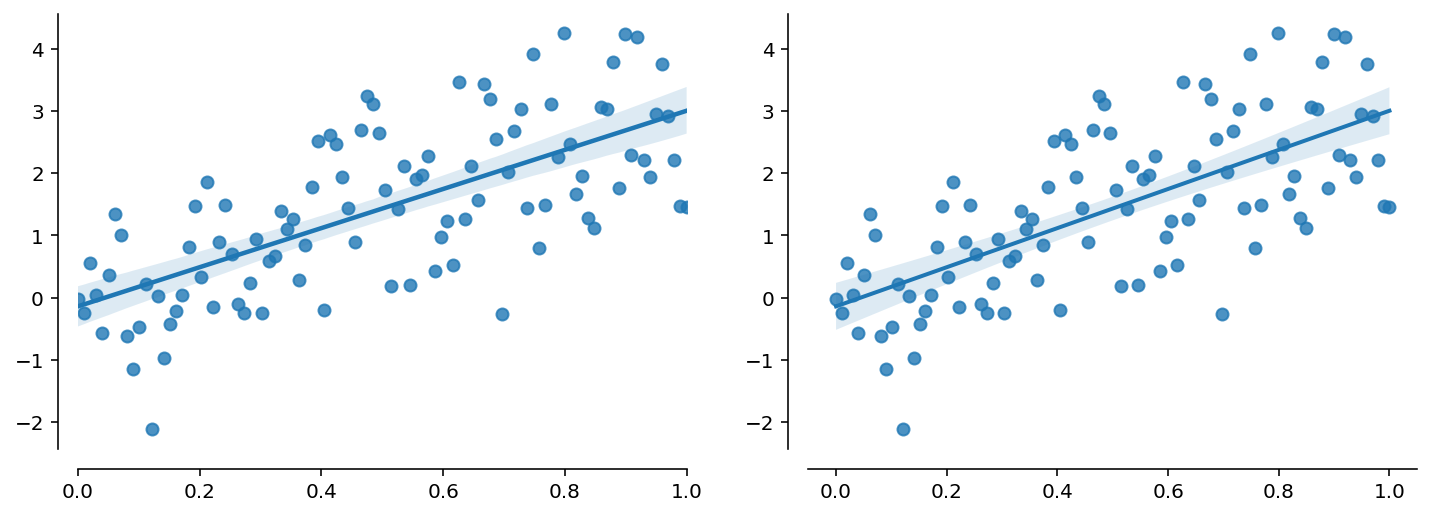

In [2]:
n = 100
alpha = 3.0
beta = -0.15
sigma = 1.0

rng = np.random.default_rng(0)
x = np.linspace(0, 1, n)
y = alpha * x + beta + sigma * rng.normal(size=n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x=x, y=y, ax=ax1)
res = gr.regplot(x=x, y=y, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## Custom plotting options

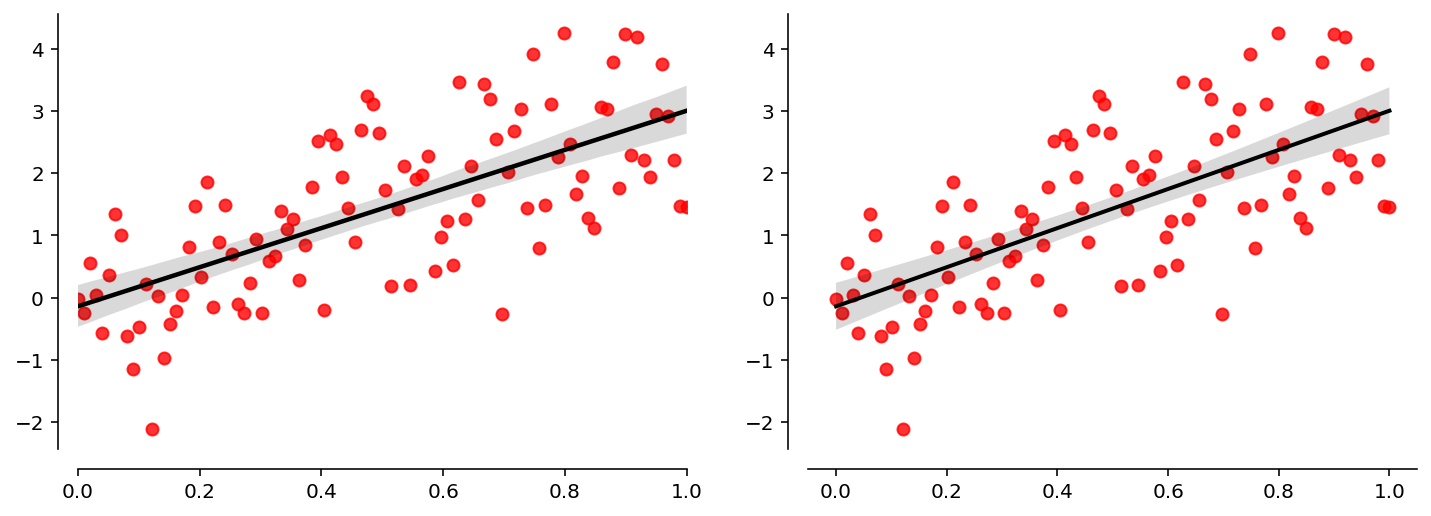

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

kwargs = {"scatter_kws": {"color": "r"}, "line_kws": {"color": "k"}}

sns.regplot(x=x, y=y, **kwargs, ax=ax1)
res = gr.regplot(x=x, y=y, **kwargs, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## `pygrutils`-specific plotting options

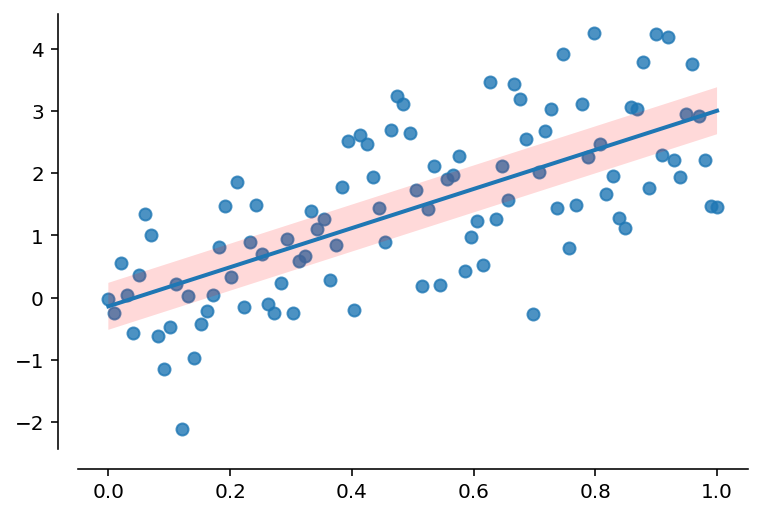

In [4]:
fig, ax = plt.subplots()

res = gr.regplot(x=x, y=y, ci_kws={"fc": "r"}, n_points=2, ax=ax)

sns.despine(offset=10, ax=ax)

## Robustness to few data points

`pygrutils.regplot` uses `statsmodels` for confidence-interval calculations. `seaborn` uses custom code. The two are similar but not exactly the same, especially when working with very few data points.

/Users/ttesileanu/.virtualenvs/pygrutils/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/Users/ttesileanu/.virtualenvs/pygrutils/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


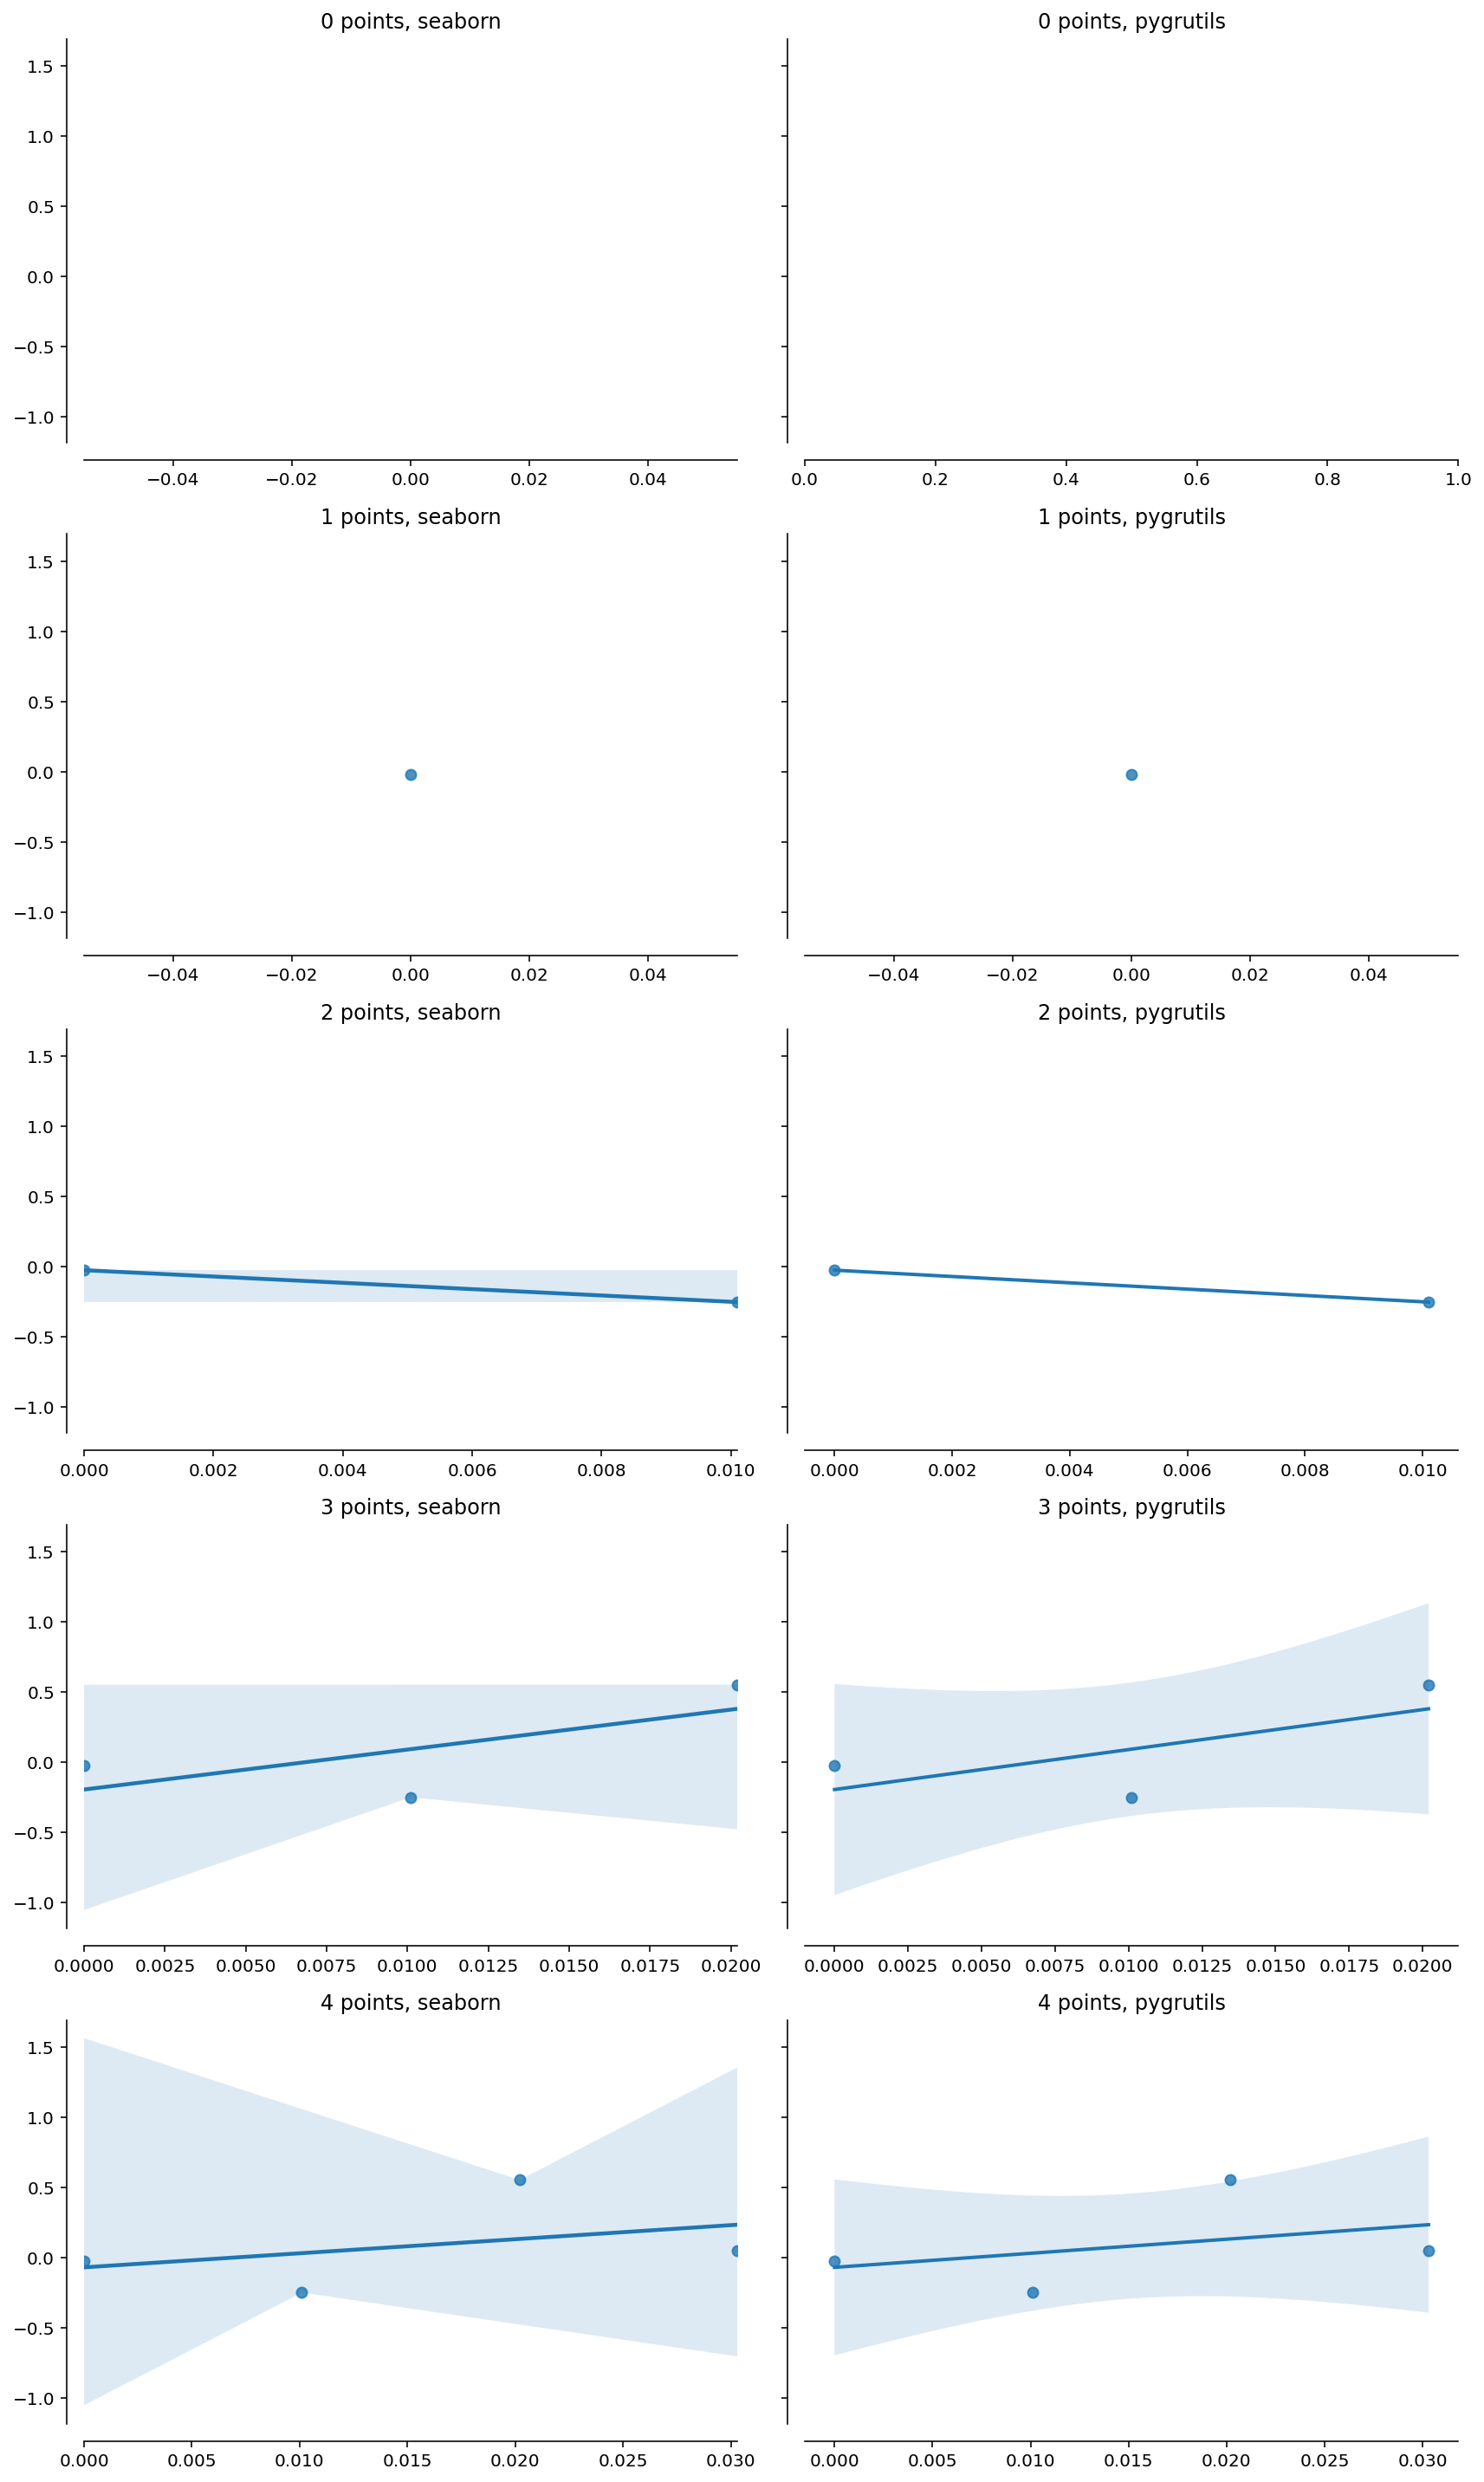

In [5]:
n_max = 5
fig, axs = plt.subplots(
    n_max, 2, figsize=(12, 4 * n_max), sharey=True, tight_layout=True
)

for i, crt_axs in enumerate(axs):
    crt_x = x[:i]
    crt_y = y[:i]

    sns.regplot(x=crt_x, y=crt_y, ax=crt_axs[0])
    gr.regplot(crt_x, crt_y, ax=crt_axs[1])

    for k, ax in enumerate(crt_axs):
        crt_name = ["seaborn", "pygrutils"][k]
        ax.set_title(f"{i} points, {crt_name}")
        sns.despine(offset=10, ax=ax)

## Usage with a `DataFrame`

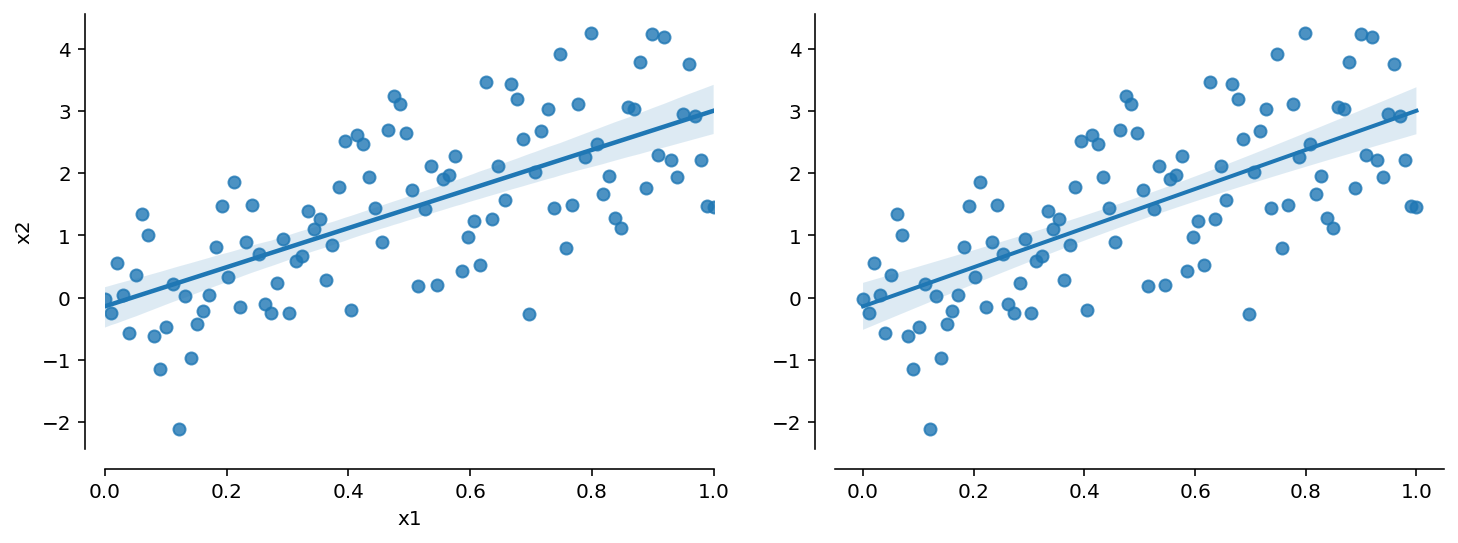

In [6]:
df = pd.DataFrame({"x1": x, "x2": y})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x="x1", y="x2", data=df, ax=ax1)
res = gr.regplot("x1", "x2", df, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## Check turning on or off the display of the scatter plot or fit line, and label

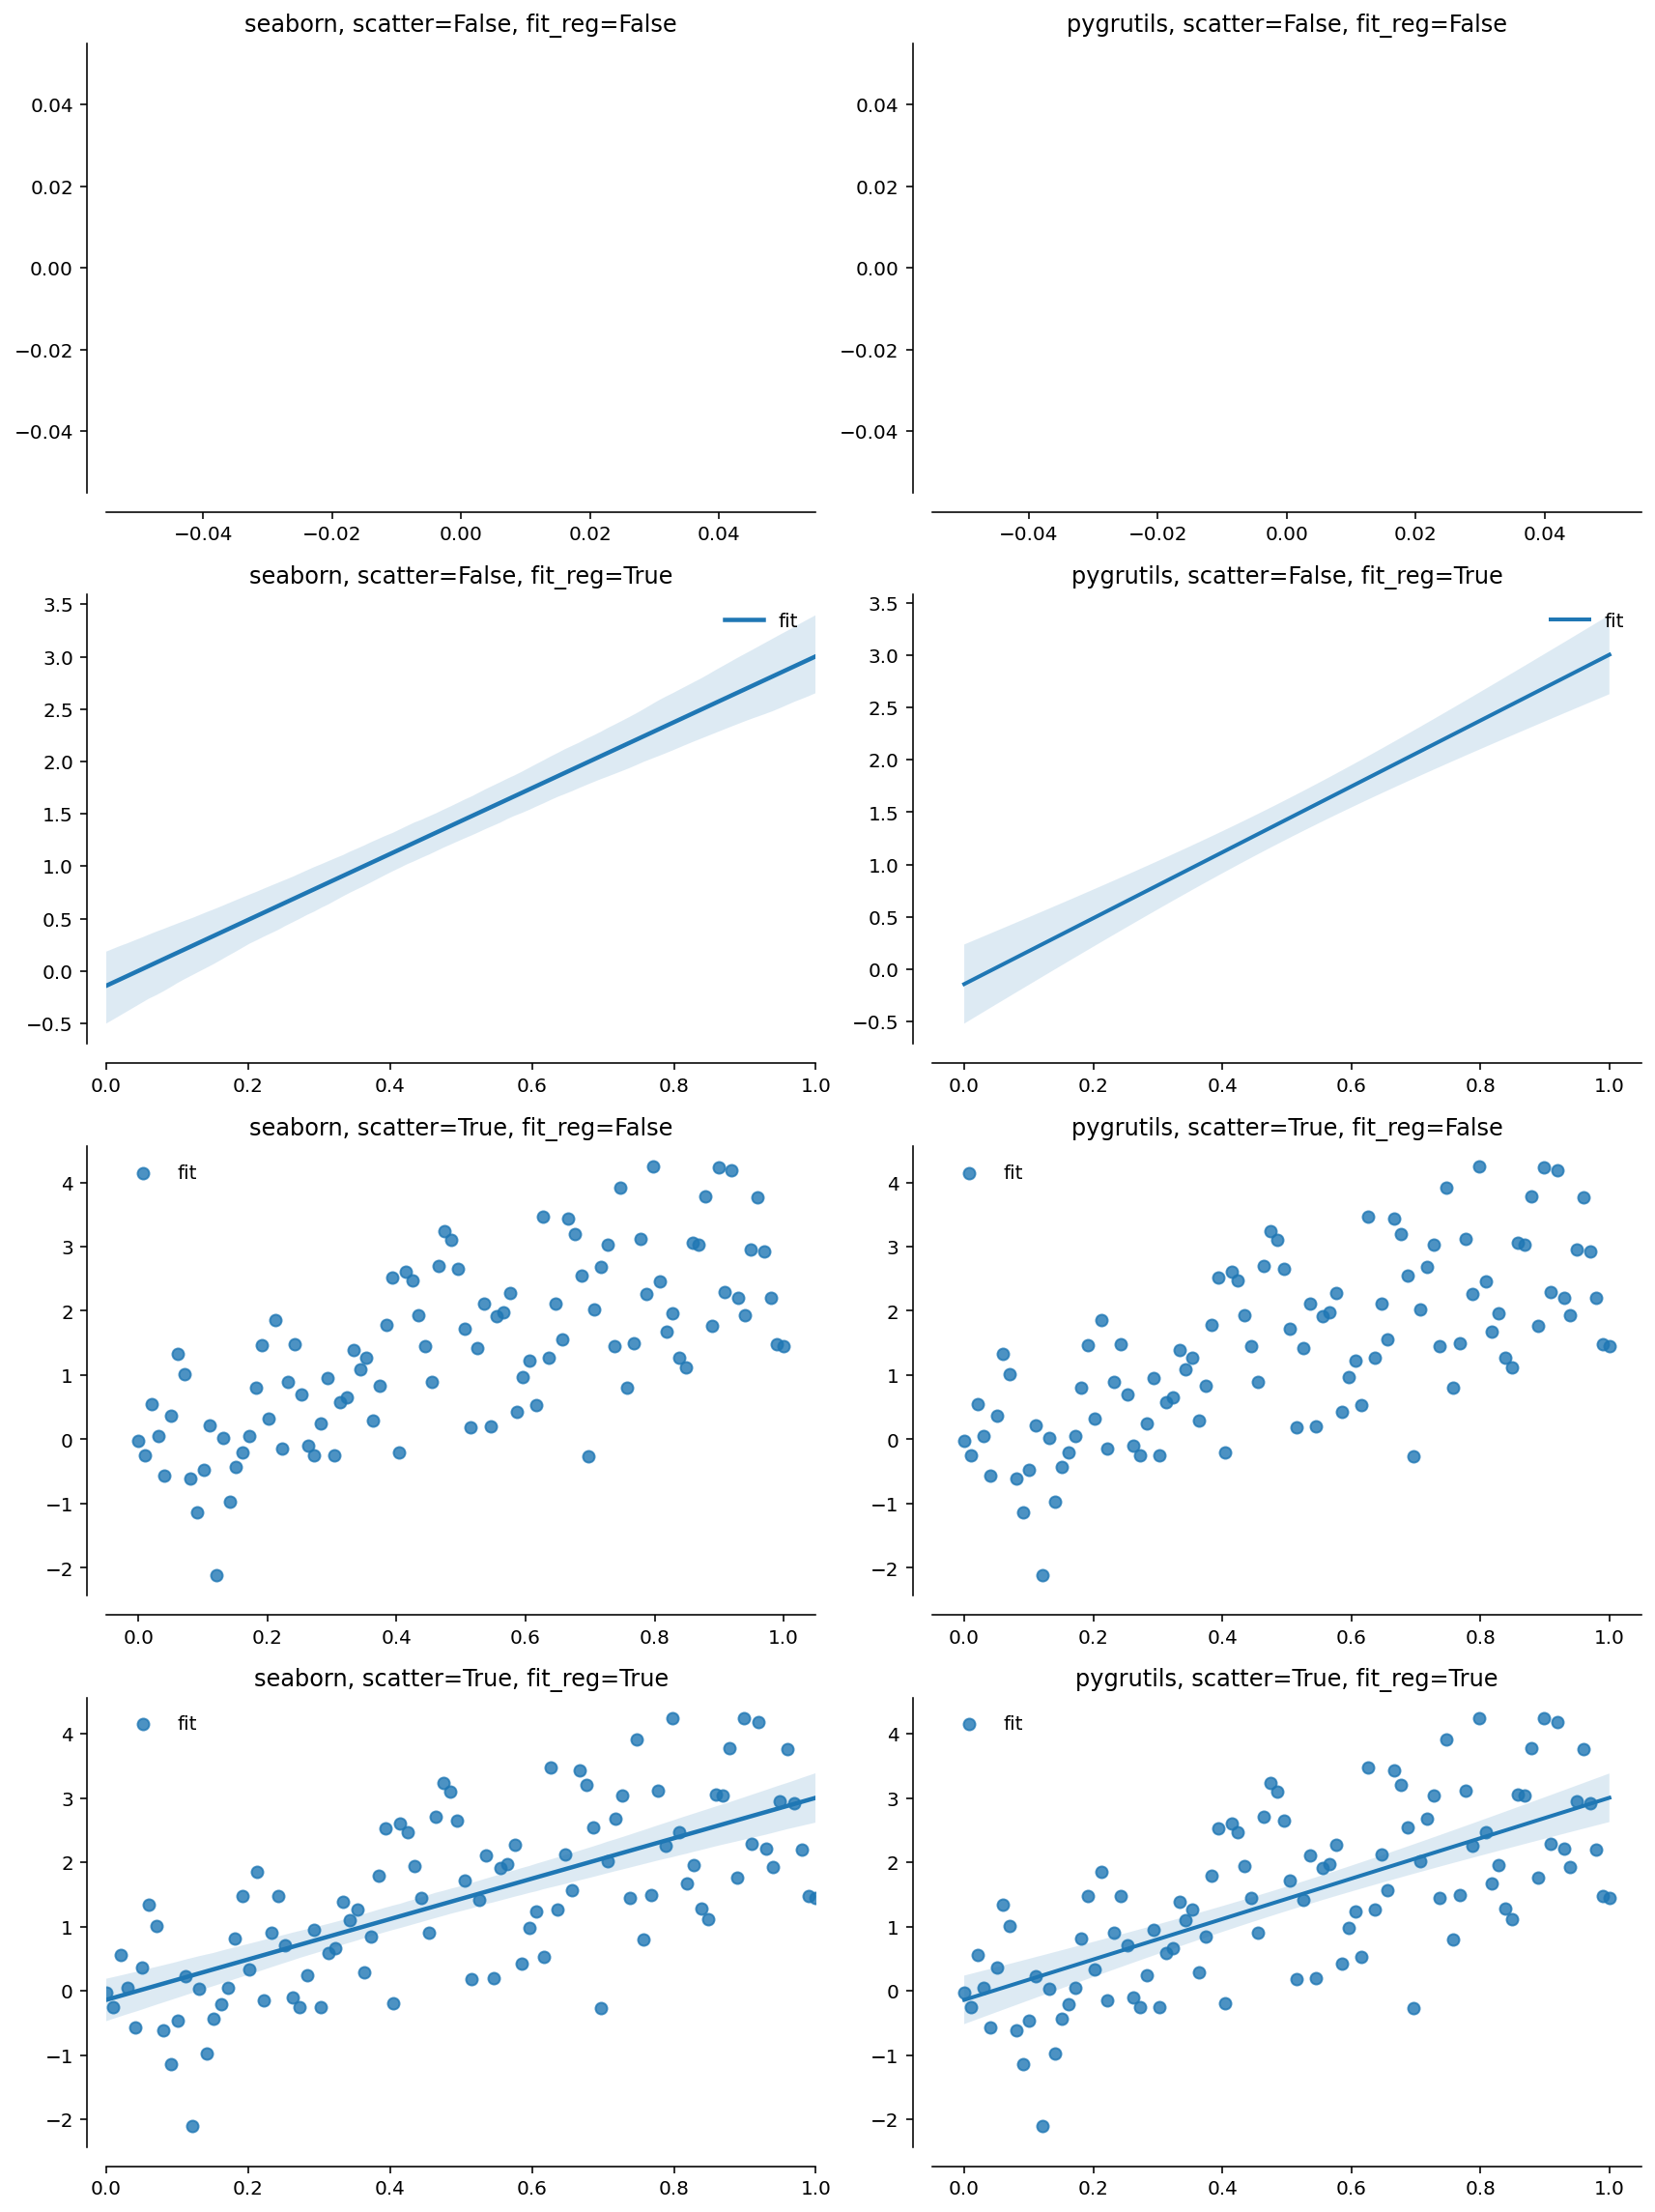

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16), tight_layout=True)

for i_scatter in range(2):
    crt_scatter = i_scatter != 0
    for i_fit in range(2):
        crt_fit = i_fit != 0

        i = i_scatter * 2 + i_fit

        sns.regplot(
            x=x, y=y, scatter=crt_scatter, fit_reg=crt_fit, label="fit", ax=axs[i, 0]
        )
        gr.regplot(
            x=x, y=y, scatter=crt_scatter, fit_reg=crt_fit, label="fit", ax=axs[i, 1]
        )
        
        if i > 0:
            axs[i, 0].legend(frameon=False)
            axs[i, 1].legend(frameon=False)

        axs[i, 0].set_title(f"seaborn, scatter={crt_scatter}, fit_reg={crt_fit}")
        axs[i, 1].set_title(f"pygrutils, scatter={crt_scatter}, fit_reg={crt_fit}")

for crt_axs in axs:
    for ax in crt_axs:
        sns.despine(offset=10, ax=ax)

## Check direct color and marker options

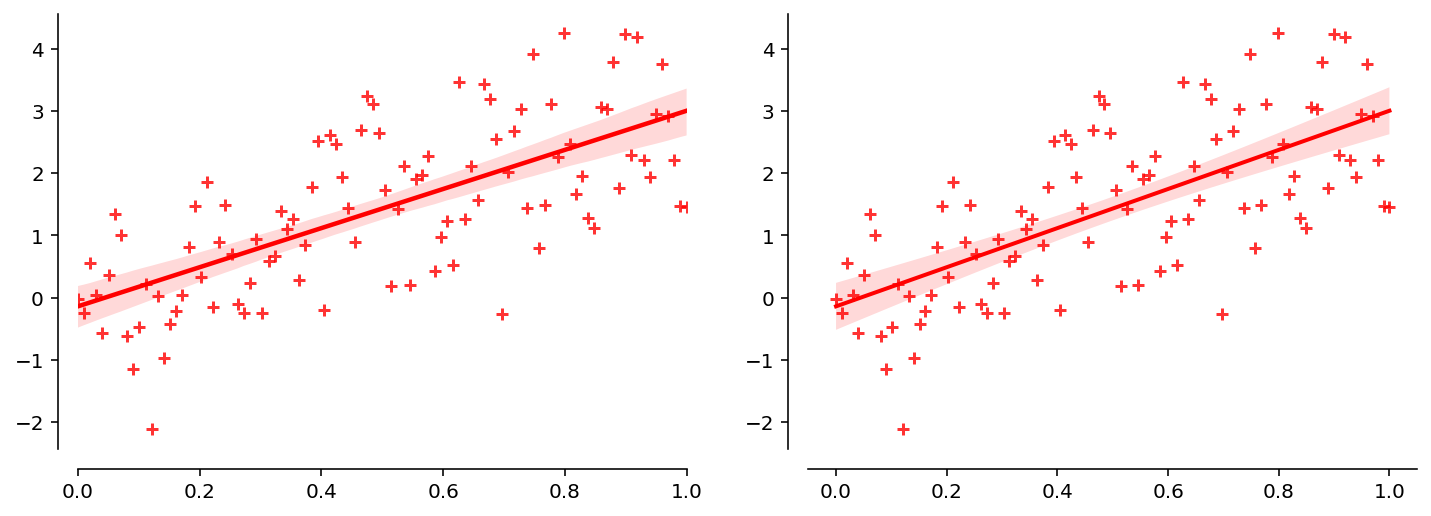

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

kwargs = {"color": "r", "marker": "+"}

sns.regplot(x=x, y=y, **kwargs, ax=ax1)
res = gr.regplot(x=x, y=y, **kwargs, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## Check CI size

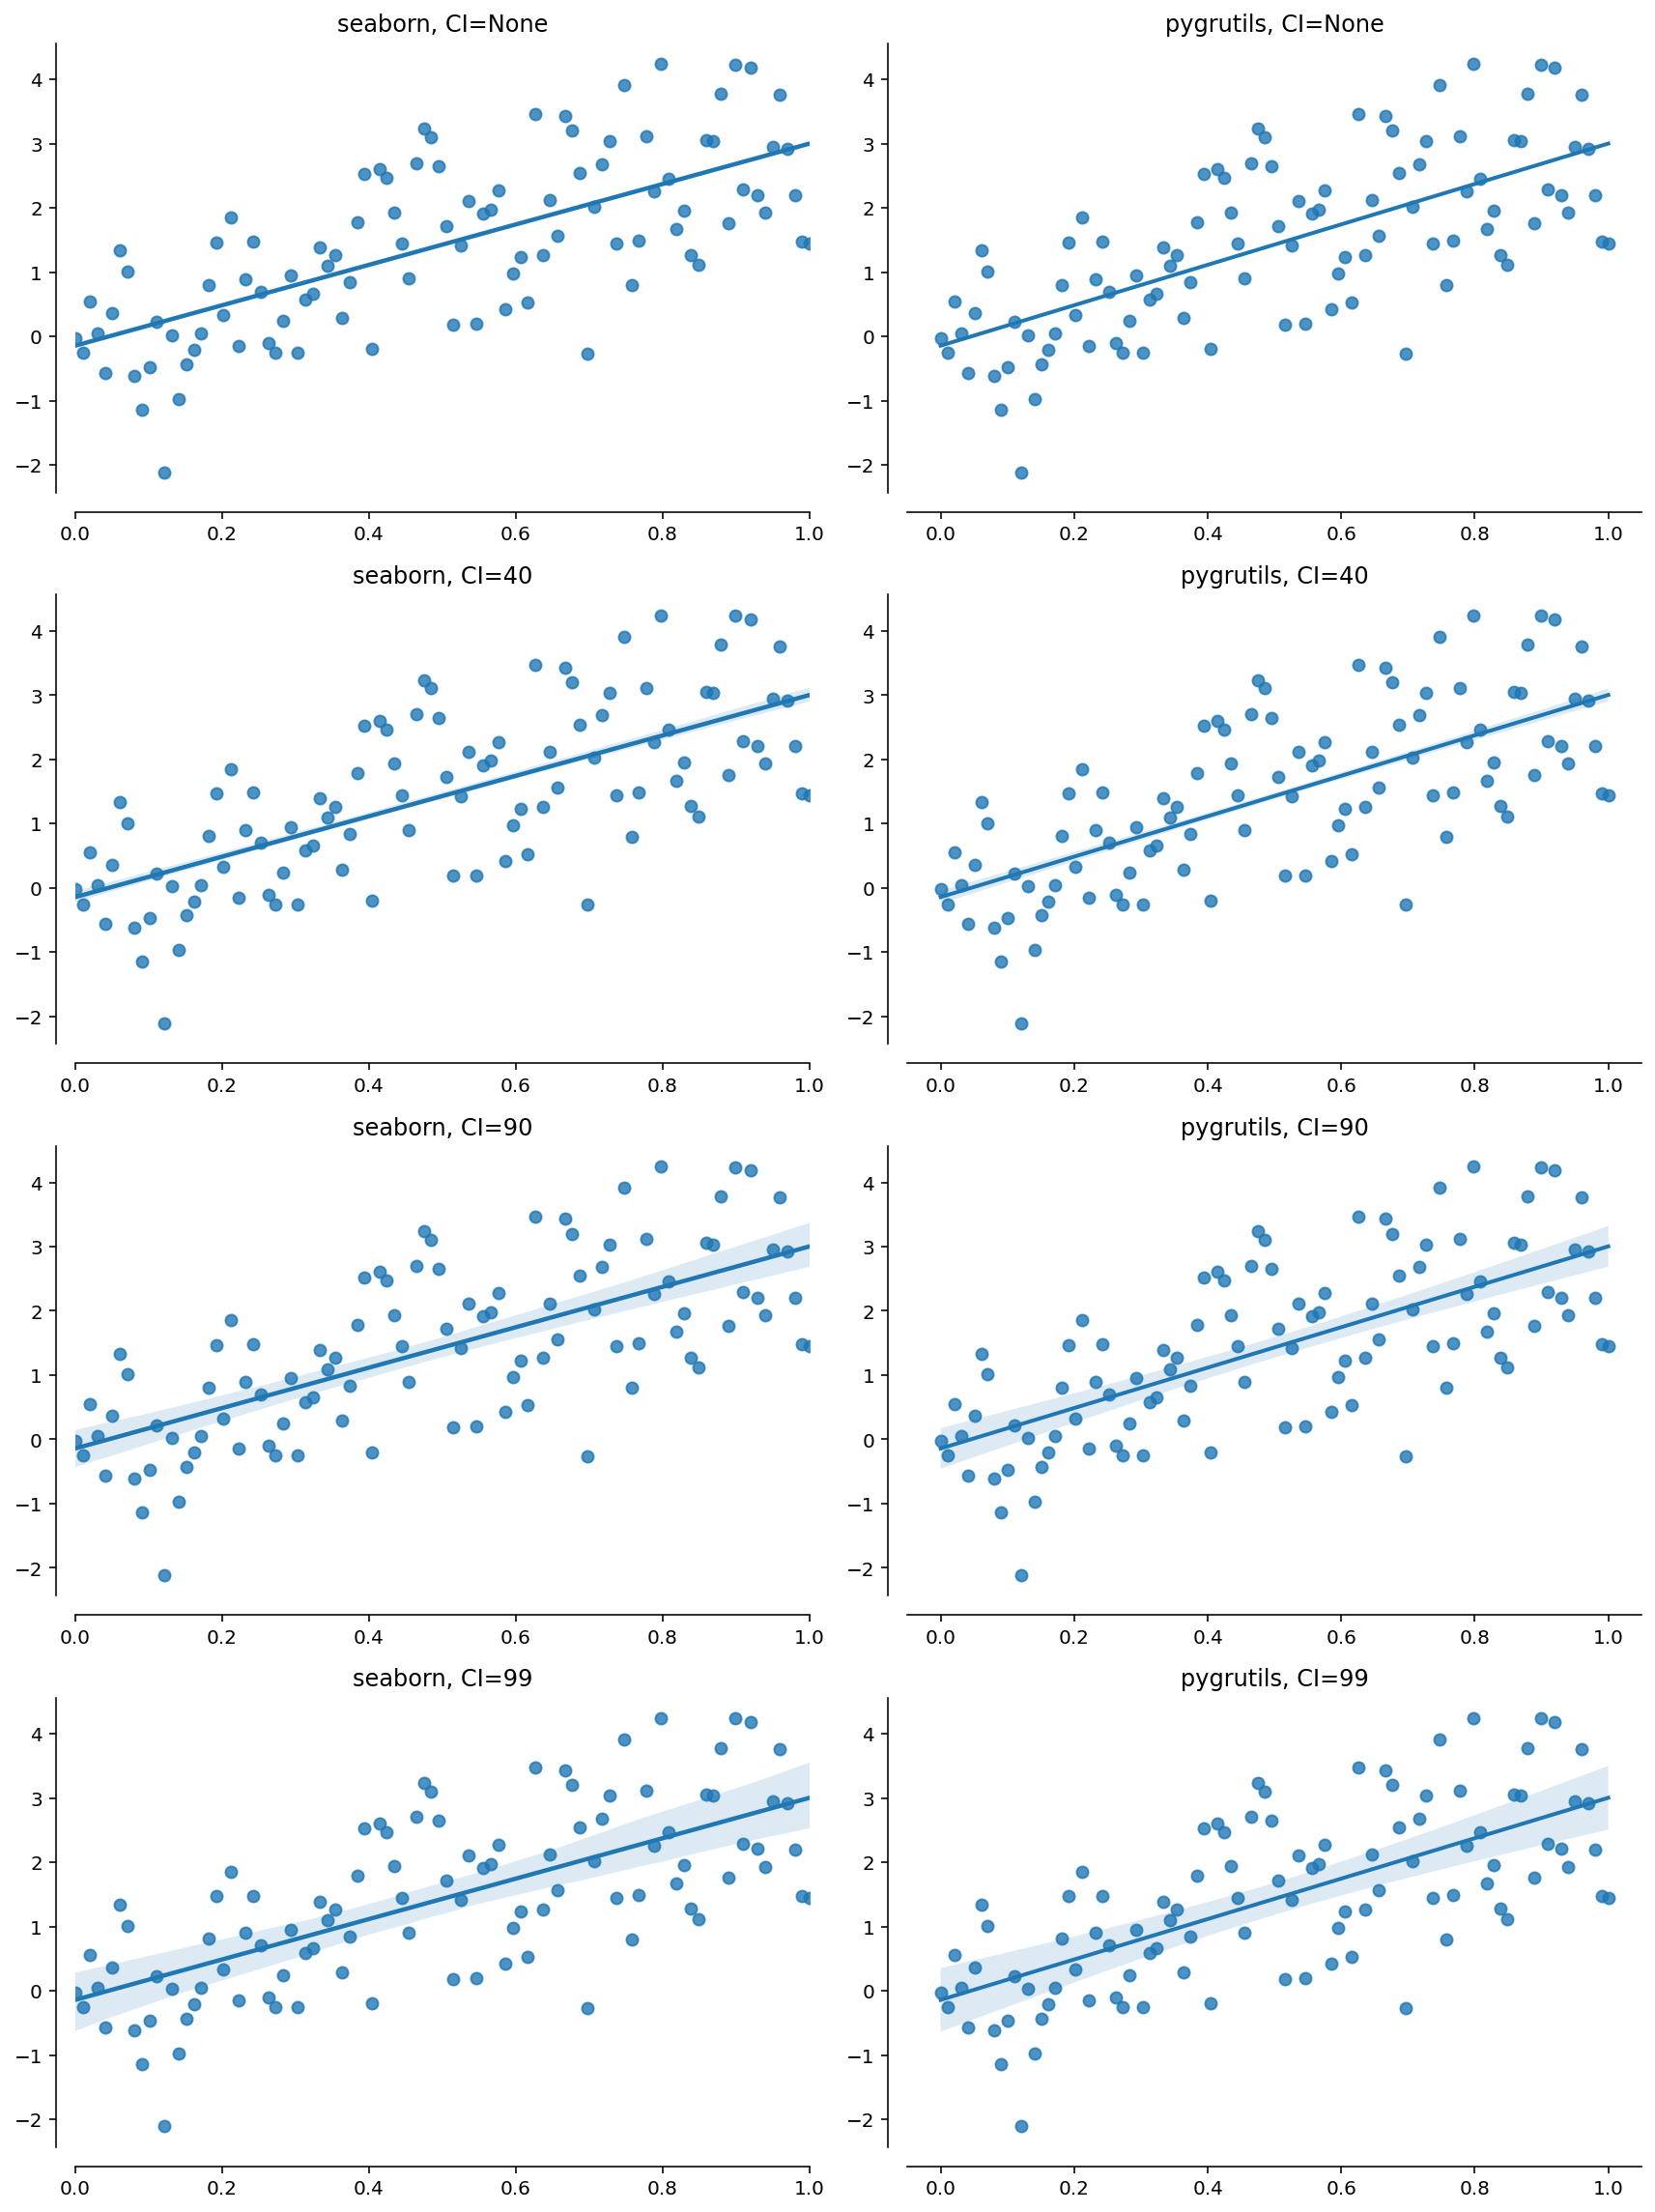

In [9]:
ci_vals = [None, 40, 90, 99]
n_ci = len(ci_vals)

fig, axs = plt.subplots(n_ci, 2, figsize=(12, n_ci * 4), tight_layout=True)

for i, ci in enumerate(ci_vals):
    crt_axs = axs[i]

    sns.regplot(x=x, y=y, ci=ci, ax=crt_axs[0])
    res = gr.regplot(x=x, y=y, ci=ci, ax=crt_axs[1])

    sns.despine(offset=10, ax=crt_axs[0])
    sns.despine(offset=10, ax=crt_axs[1])

    crt_axs[0].set_title(f"seaborn, CI={ci}")
    crt_axs[1].set_title(f"pygrutils, CI={ci}")

## Check truncate

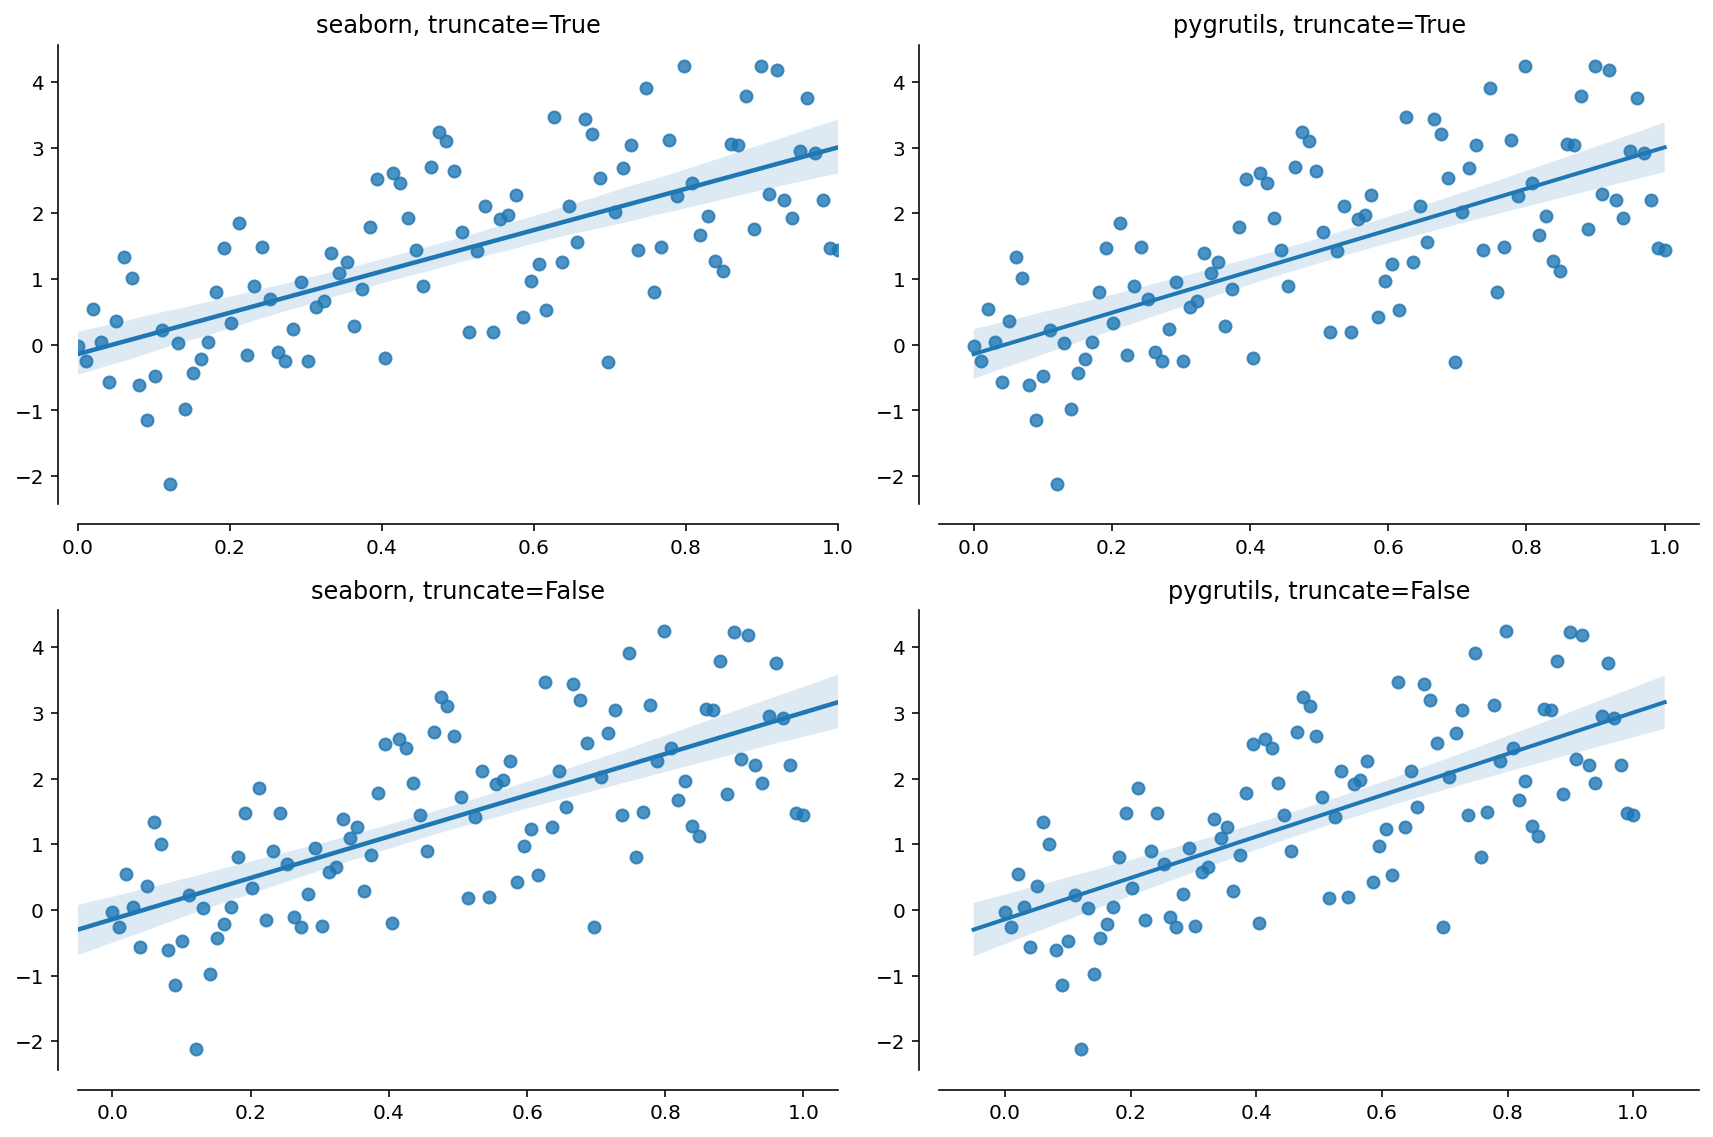

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)

for i, crt_axs in enumerate(axs):
    sns.regplot(x=x, y=y, truncate=i == 0, ax=crt_axs[0])
    res = gr.regplot(x=x, y=y, truncate=i == 0, ax=crt_axs[1])

    sns.despine(offset=10, ax=crt_axs[0])
    sns.despine(offset=10, ax=crt_axs[1])

    crt_axs[0].set_title(f"seaborn, truncate={i == 0}")
    crt_axs[1].set_title(f"pygrutils, truncate={i == 0}")

## Check higher order fits

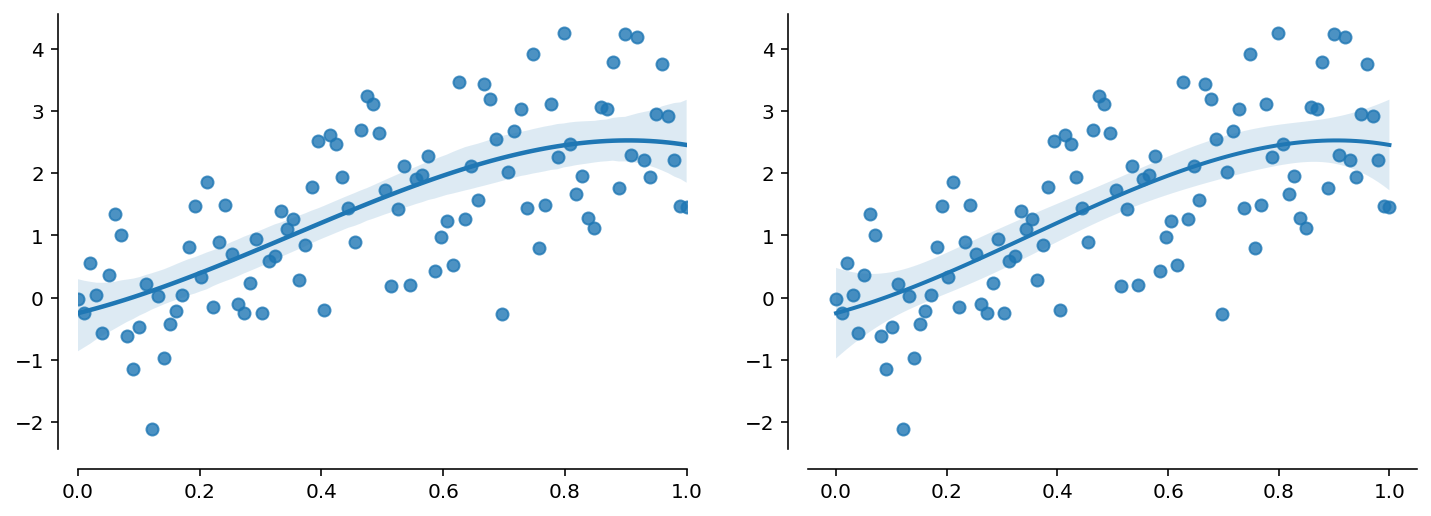

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

order = 3
sns.regplot(x=x, y=y, order=order, ax=ax1)
res = gr.regplot(x=x, y=y, order=order, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## Check jitter

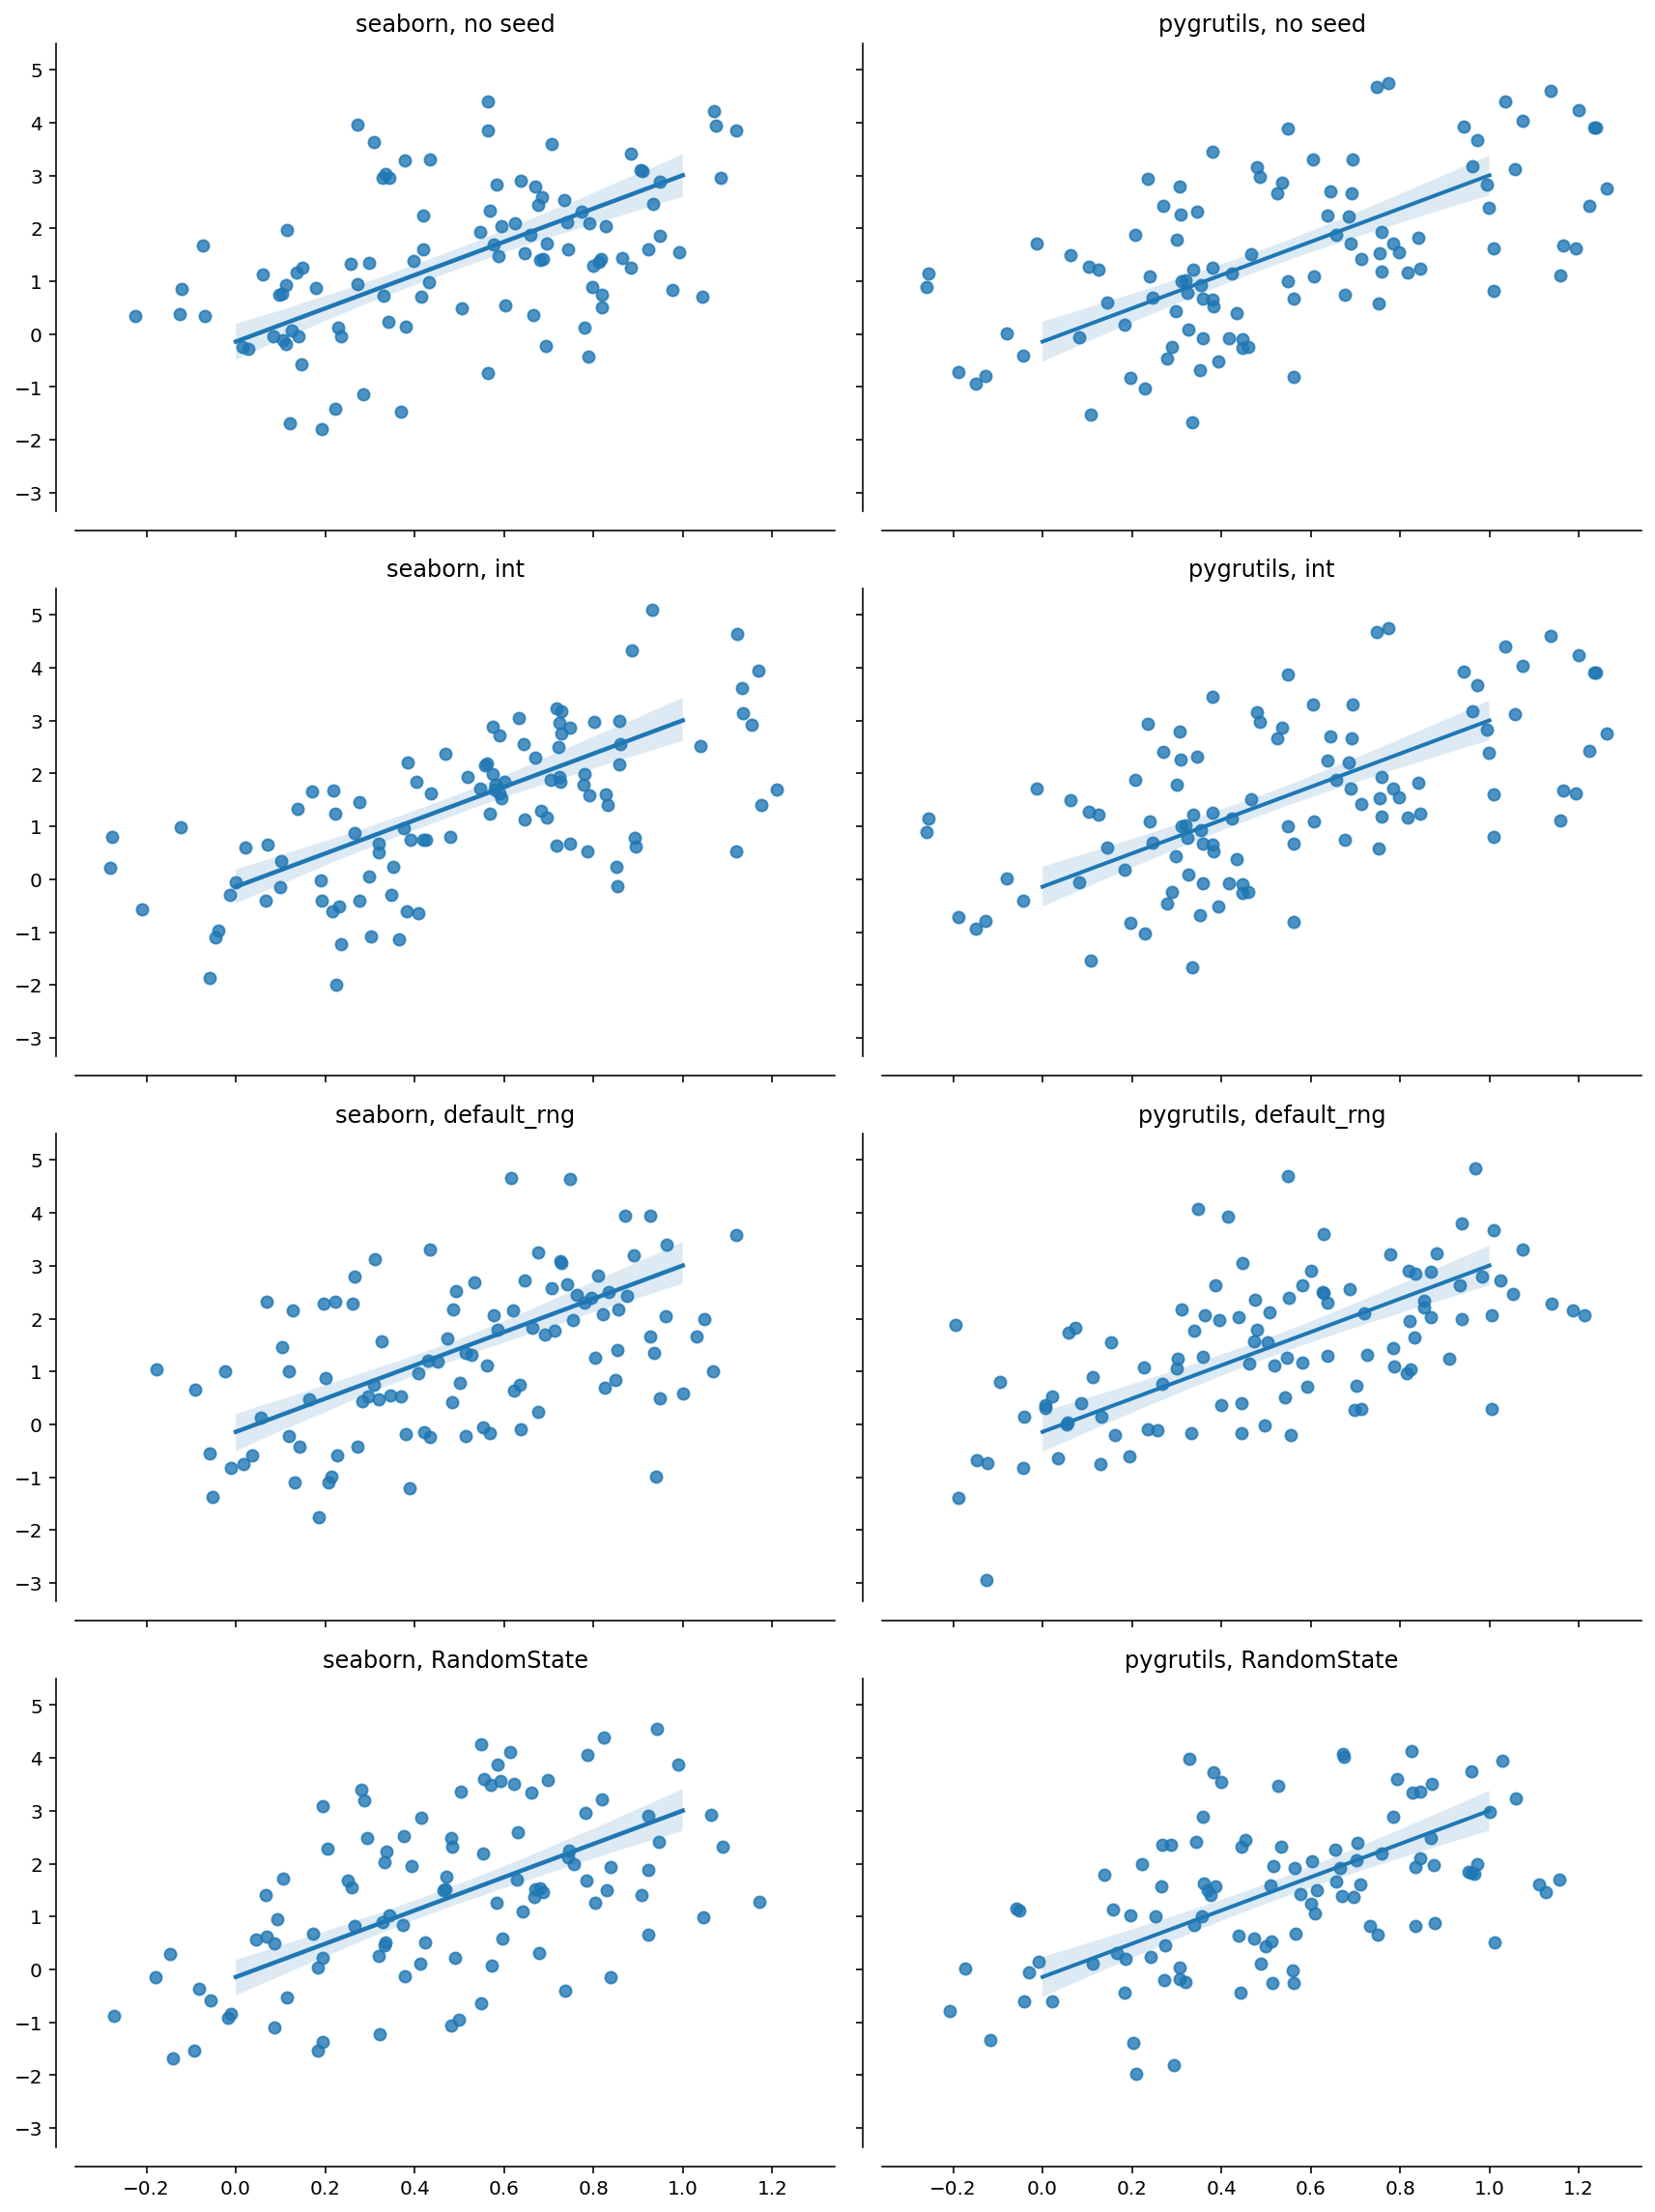

In [12]:
fig, axs = plt.subplots(
    4, 2, figsize=(12, 16), sharex=True, sharey=True, tight_layout=True
)

for i, (ax1, ax2) in enumerate(axs):
    kwargs = {"x_jitter": 0.3, "y_jitter": 1.0}
    if i > 0:
        kwargs["seed"] = [0, np.random.default_rng(1), np.random.RandomState(2)][i - 1]

    crt_name = ["no seed", "int", "default_rng", "RandomState"][i]

    sns.regplot(x=x, y=y, **kwargs, ax=ax1)
    res = gr.regplot(x=x, y=y, **kwargs, ax=ax2)

    ax1.set_title("seaborn, " + crt_name)
    ax2.set_title("pygrutils, " + crt_name)

    sns.despine(offset=10, ax=ax1)
    sns.despine(offset=10, ax=ax2)

## Check logx

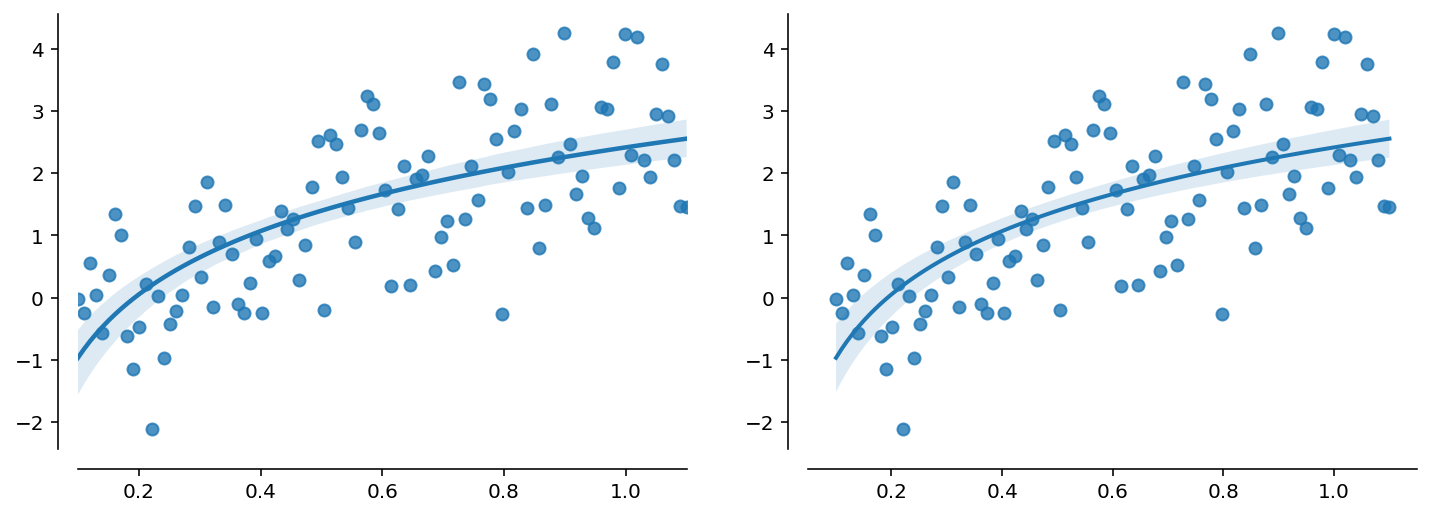

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x=x + 0.1, y=y, logx=True, ax=ax1)
res = gr.regplot(x=x + 0.1, y=y, logx=True, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## Check logx with polynomial regression

Seaborn doesn't do this.

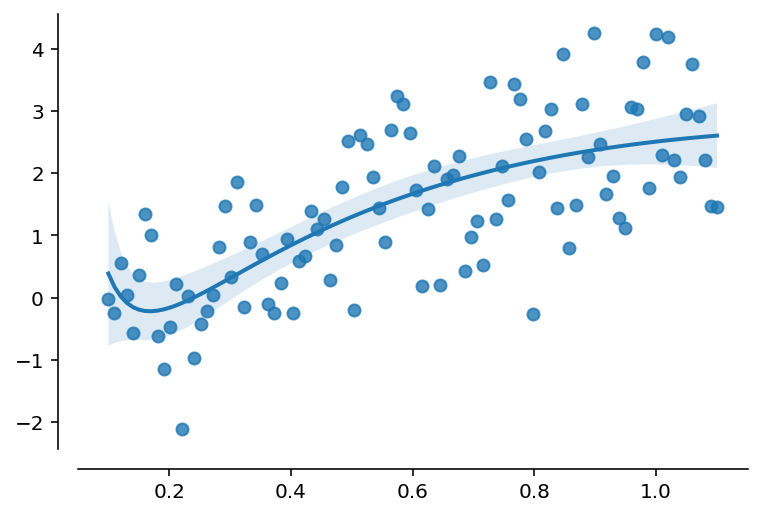

In [14]:
fig, ax = plt.subplots()

order = 3
res = gr.regplot(x=x + 0.1, y=y, logx=True, order=order, ax=ax)

sns.despine(offset=10, ax=ax)

## Check x_estimator

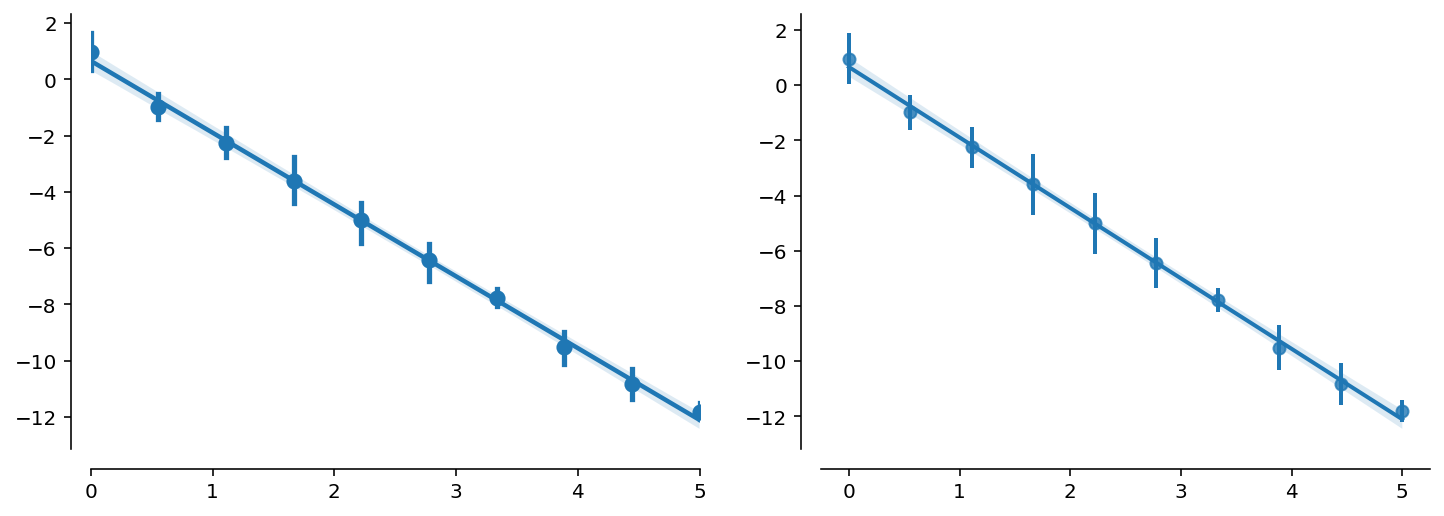

In [15]:
x_unique = np.linspace(0, 5, 10)
y_means = -2.5 * x_unique + 0.6

rng = np.random.default_rng(1)
y_per_x = 8
y_values = rng.normal(loc=y_means, size=(y_per_x, len(y_means))).T.ravel()
x_values = np.repeat(x_unique, y_per_x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x=x_values, y=y_values, x_estimator=np.mean, ax=ax1)
gr.regplot(x=x_values, y=y_values, x_estimator=np.mean, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

## Test separate `scatter` function

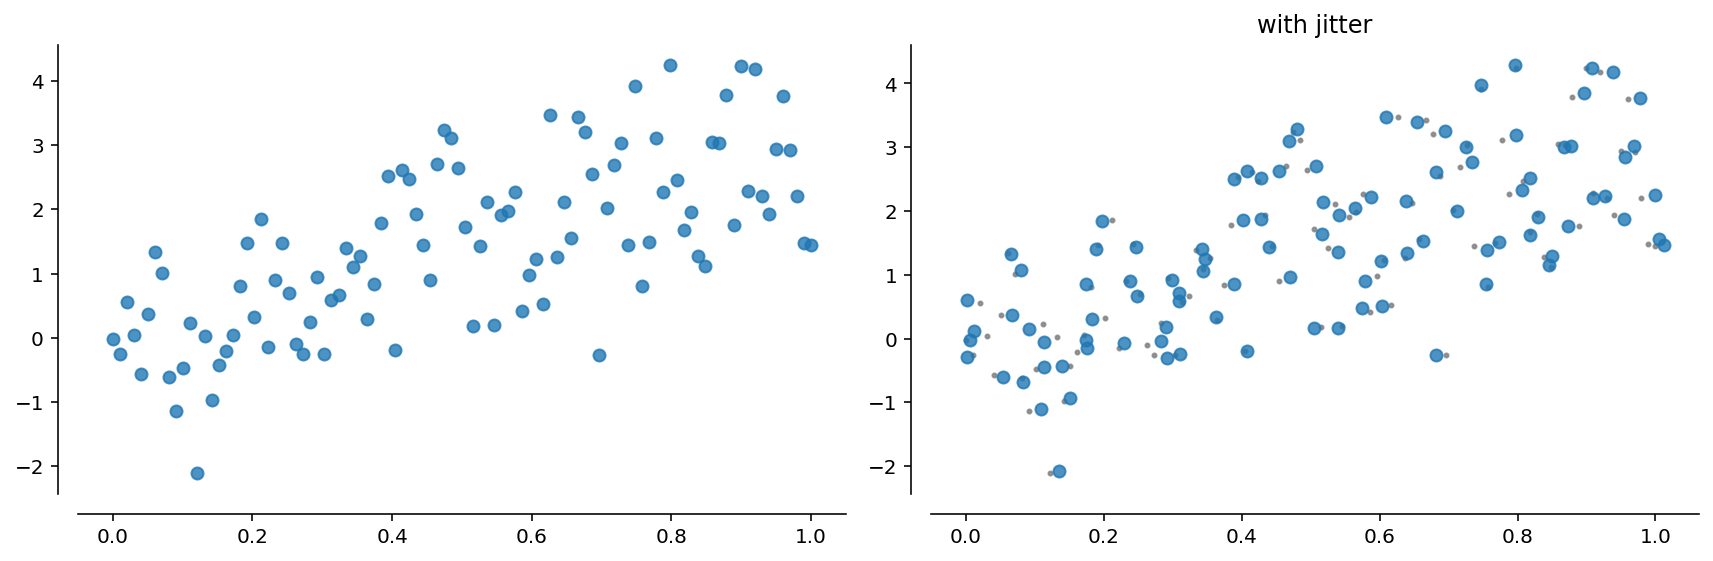

In [16]:
df = pd.DataFrame({"x1": x, "x2": y})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)

gr.scatter("x1", "x2", df, ax=ax1)

gr.scatter("x1", "x2", df, s=4, c="gray", ax=ax2)
gr.scatter(x, "x2", df, x_jitter=0.02, y_jitter=0.08, ax=ax2)

ax2.set_title("with jitter")

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)

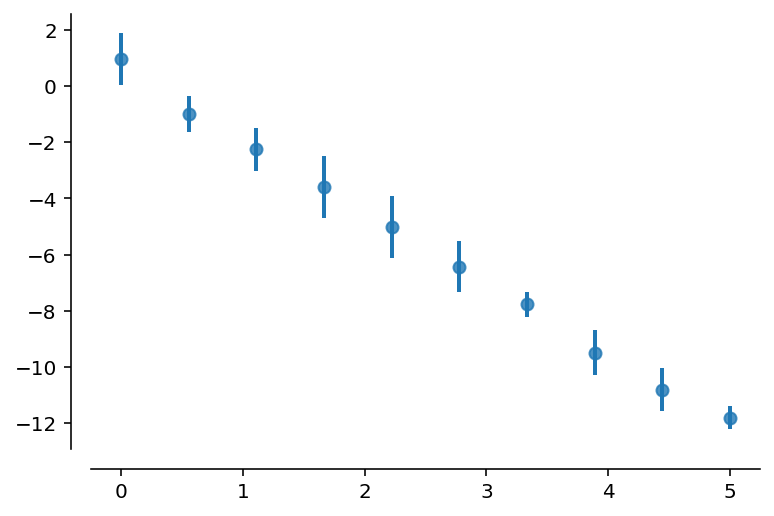

In [17]:
fig, ax = plt.subplots()

gr.scatter(x=x_values, y=y_values, x_estimator=np.mean, ax=ax)

sns.despine(offset=10, ax=ax)

## Test separate `fitplot` function

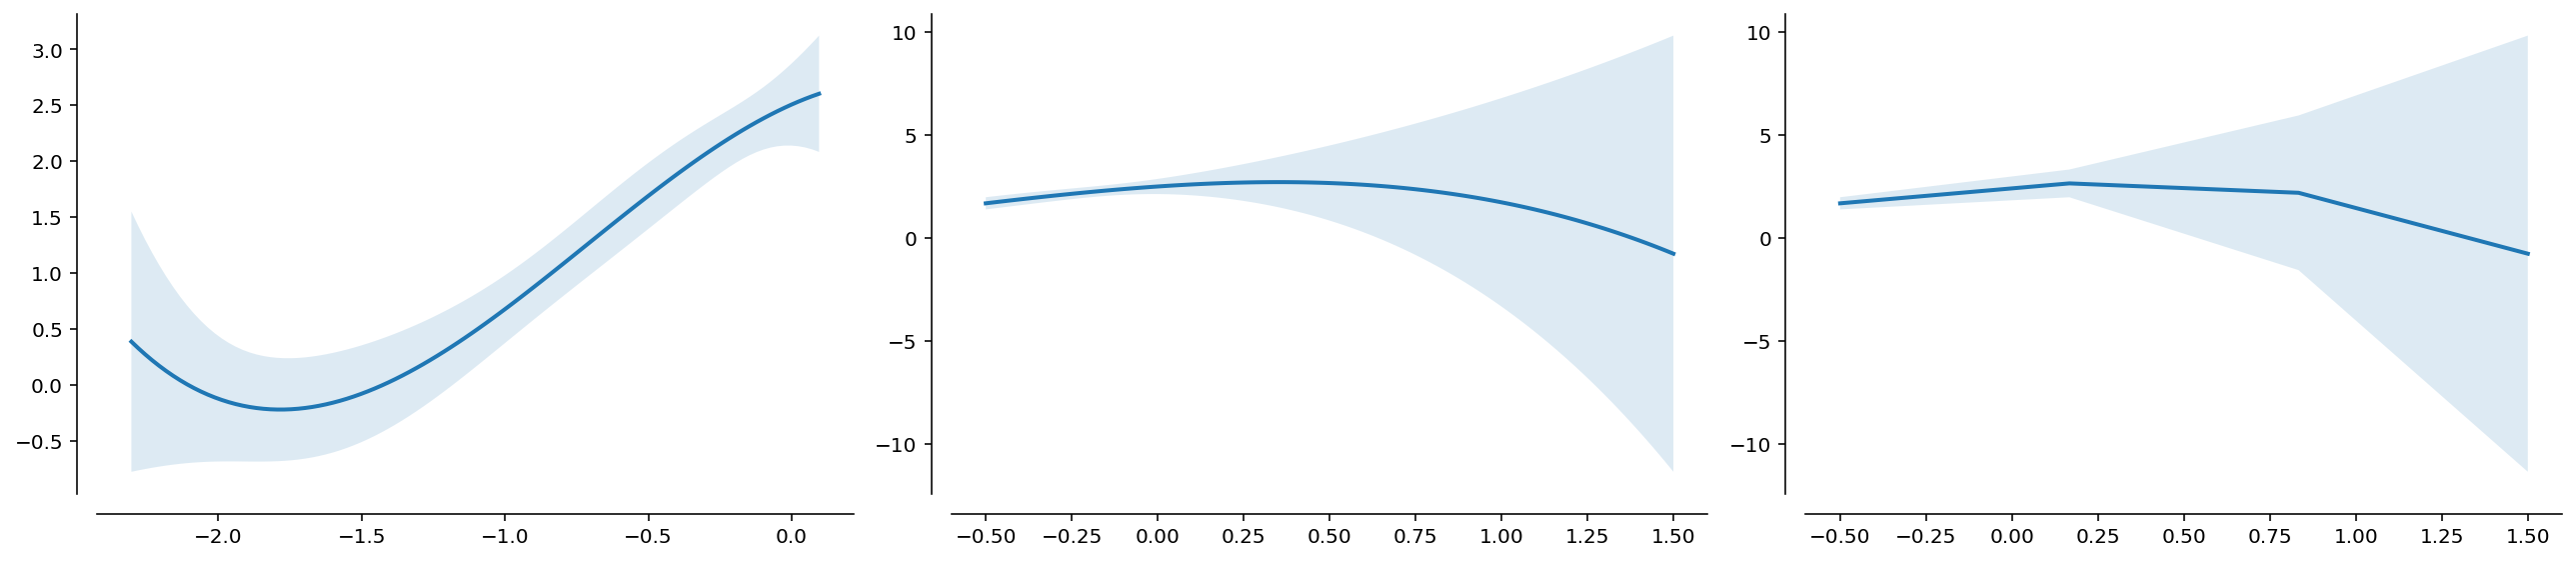

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4), tight_layout=True)

gr.fitplot(res, ax=ax1)
gr.fitplot(x_range=(-0.5, 1.5), fit_results=res, ax=ax2)
gr.fitplot(x=np.linspace(-0.5, 1.5, 4), fit_results=res, ax=ax3)

for ax in [ax1, ax2, ax3]:
    sns.despine(offset=10, ax=ax)

## Test `fitplot` with `polyfit`

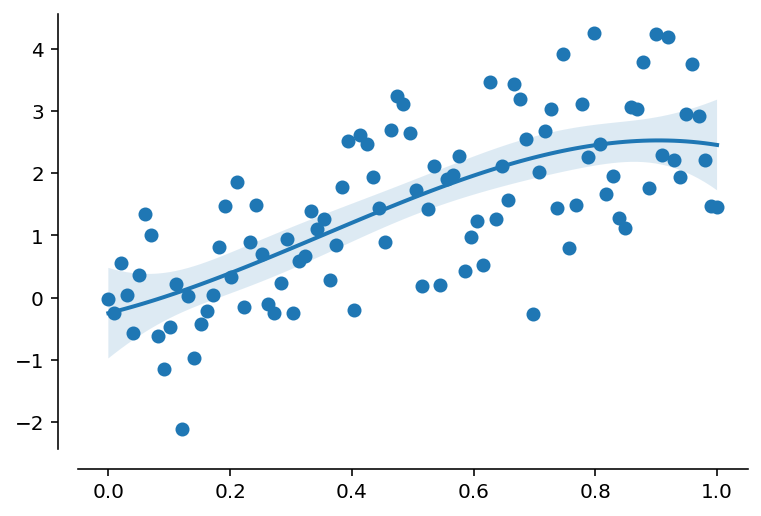

In [19]:
fig, ax = plt.subplots()

ax.scatter(x, y)
poly_res = gr.polyfit(x, y, order=3)
gr.fitplot(poly_res, ax=ax)

sns.despine(offset=10, ax=ax)

## Test speed

sns.regplot took 4.52 seconds.
gr.regplot took 0.02 seconds.


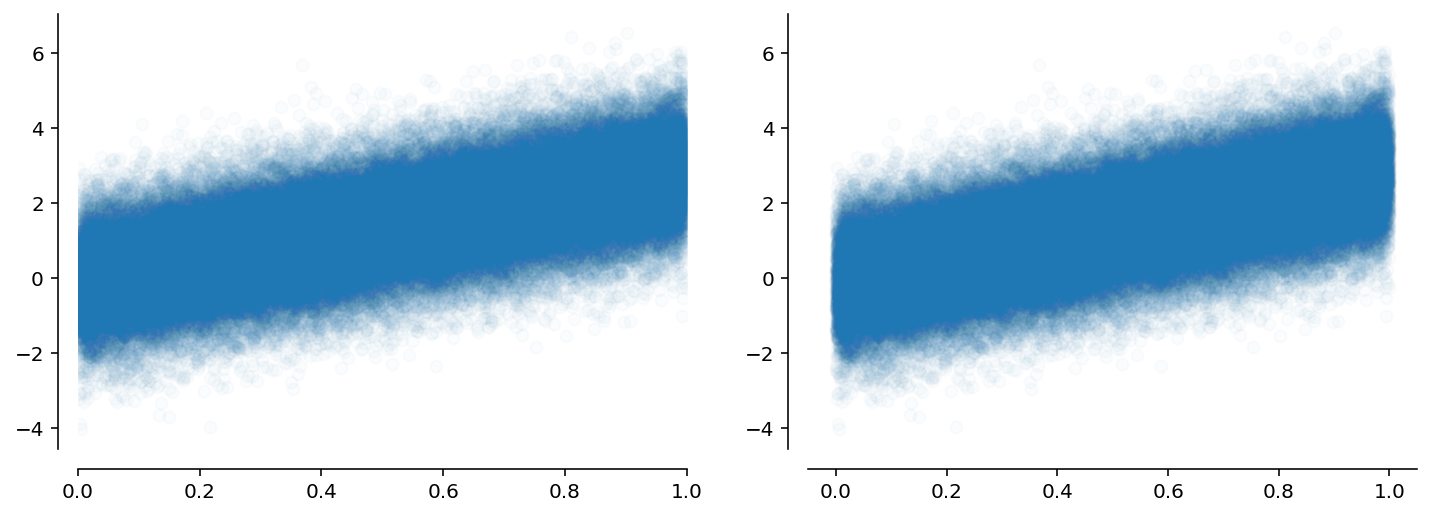

In [20]:
rng = np.random.default_rng(0)
big_n = 100_000
big_x = np.linspace(0, 1, big_n)
big_y = alpha * big_x + beta + sigma * rng.normal(size=big_n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

t0 = time.time()
sns.regplot(x=big_x, y=big_y, scatter_kws={"alpha": 0.02}, ax=ax1)
t1 = time.time()
print(f"sns.regplot took {t1 - t0:.2f} seconds.")
res = gr.regplot(x=big_x, y=big_y, scatter_kws={"alpha": 0.02}, ax=ax2)
t2 = time.time()
print(f"gr.regplot took {t2 - t1:.2f} seconds.")

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)